This notebook will demonstrate how LDA is used to create linearly separable boundaries for the wine dataset, which relates 13 variables to a target variable with 3 unique values.

For information on this dataset please visit:  https://archive.ics.uci.edu/ml/datasets/wine

In [16]:
import numpy as np
from sklearn.model_selection import train_test_split
from algorithms.VarianceReduction.lda import LDA
from utils import standardize
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [3]:
data = np.loadtxt('data/wine.csv', delimiter=",")

In [17]:
X = standardize(data[:, 1:])
y = data[:, 0]

In [18]:
lda = LDA(n_discriminants=2)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=0)

In [19]:
lda.fit(X_train, y_train)

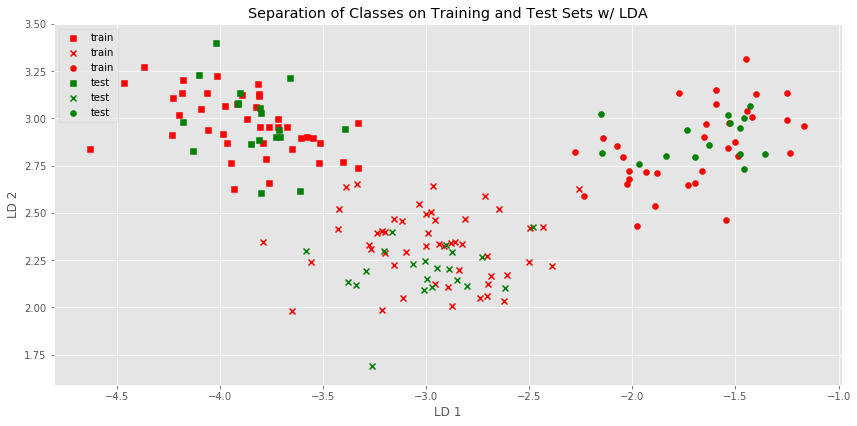

In [31]:
X_train_lda = lda.transform(X_train)
X_test_lda  = lda.fit_transform(X_test, y_test)
markers = ['s', 'x', 'o']
plt.figure(figsize=(12, 6))
for l, m in zip(np.unique(y), markers):
    plt.scatter(X_train_lda[y_train == l, 0],
                X_train_lda[y_train == l, 1] * (-1),
                c='r', label='train', marker=m)
  
for l, m in zip(np.unique(y), markers):
    plt.scatter(X_test_lda[y_test == l, 0],
                X_test_lda[y_test == l, 1] * (-1),
                c='g', label='test', marker=m)
plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.title("Separation of Classes on Training and Test Sets w/ LDA")
plt.legend(loc='best')
plt.tight_layout(True)

As we can see above, there is a near perfect separation between the different classes for both training and test sets.